In [1]:
import numpy as np
from scipy import ndimage
import cv2 as cv
import math
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
CONV_KERNEL_4_11 = np.array([
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1],
    [-1, -1, -1, -1, 2, 2, 2, 2, -1, -1, -1, -1]])

In [3]:
def drawGrayHist(img, maxValue = 256, title = 'GrayHistogram'):
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.hist(img.ravel(), maxValue, [0,maxValue])
    plt.xlim([0, maxValue])
    plt.grid()
    plt.show()
    return

def drawGrayHistMasked(img, maxValue = 256, title = 'MaskedHistogram'):
    # create a mask
    height = img.shape[0]
    width = img.shape[1]
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[int(height/4): int(height * 3 / 4), int(width/4): int(width * 3/4)] = 255
    #masked_img = cv.bitwise_and(img, img, mask = mask)
    hist_mask = cv.calcHist([img], [0], mask, [maxValue], [0, maxValue])
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.plot(hist_mask,color = 'b')
    plt.xlim([0, maxValue])
    plt.grid()
    plt.show()
    
    
def makeConvolveFiltering(img):
     #преобразуем в полярную систему координат
    polar = cv.linearPolar(img, (img.shape[1]//2 , img.shape[0]//2), img.shape[1]//2,  cv.WARP_FILL_OUTLIERS)
    convolved_polar = ndimage.convolve(np.float32(polar), CONV_KERNEL_4_11)
    abs_polar = np.abs(convolved_polar)
    return abs_polar

In [4]:
mypath = "AllRings/"
imgFiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(imgFiles)

['center.PNG', 'crop.png', 'lines.png', 'many.png', 'notrings1.png', 'notrings2.PNG', 'notrings3.png', 'notrings4.png', 'part.png', 'rings1.png', 'rings10.png', 'rings11.png', 'rings12.png', 'rings13.png', 'rings2.png', 'rings3.PNG', 'rings4.PNG', 'rings5.PNG', 'rings6.png', 'rings7.png', 'rings8.png', 'rings9.png']


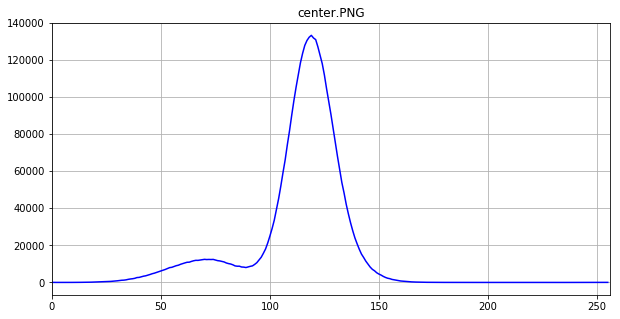

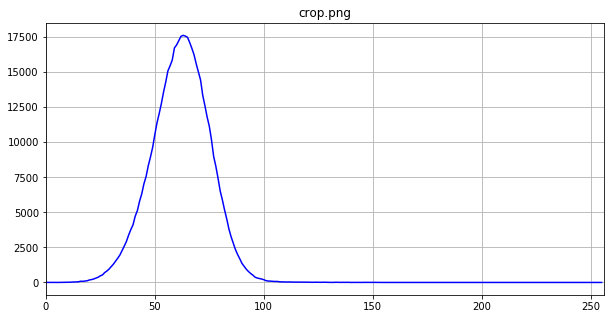

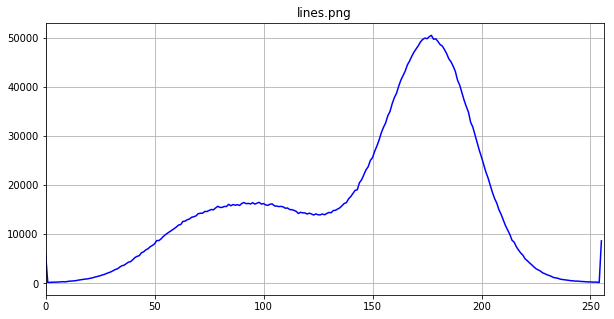

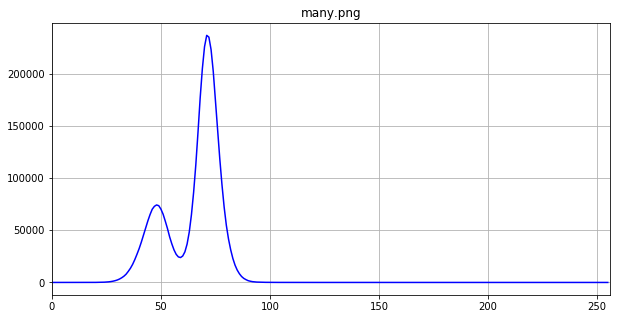

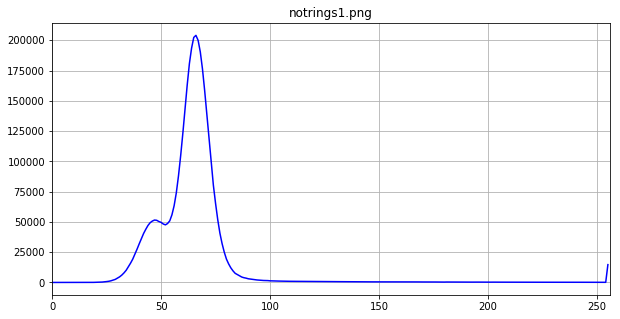

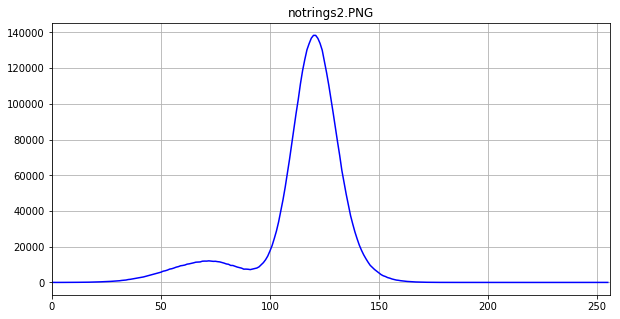

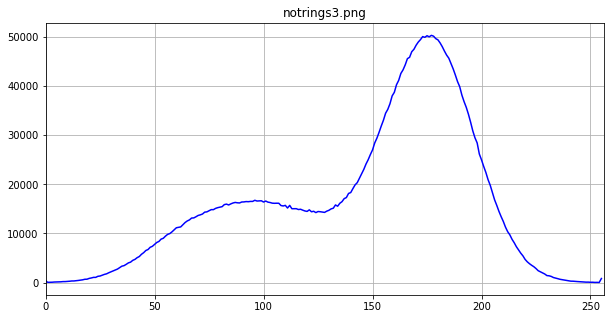

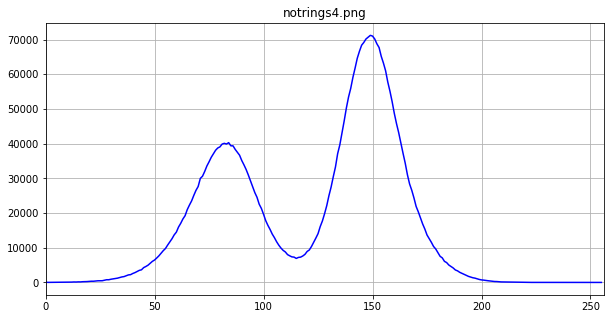

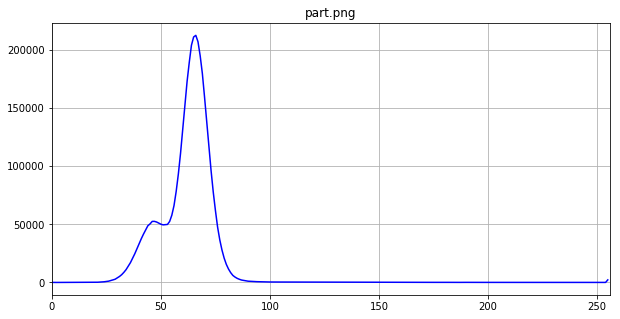

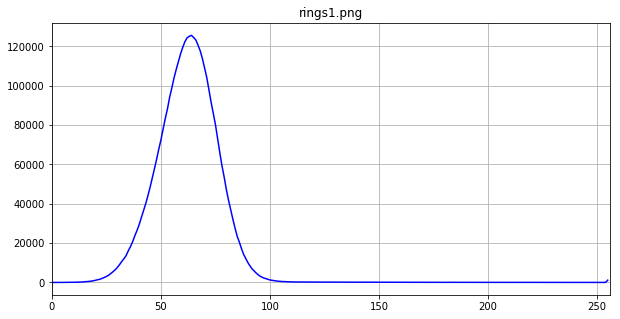

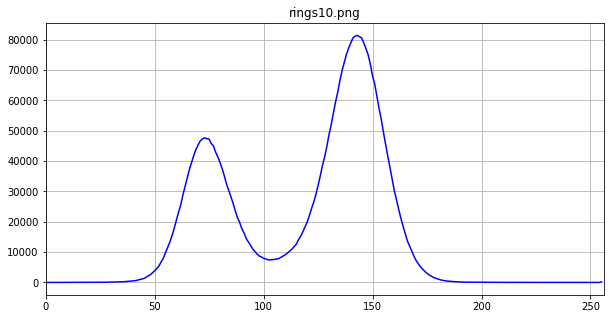

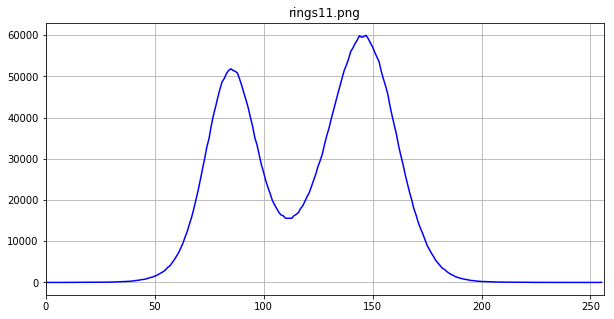

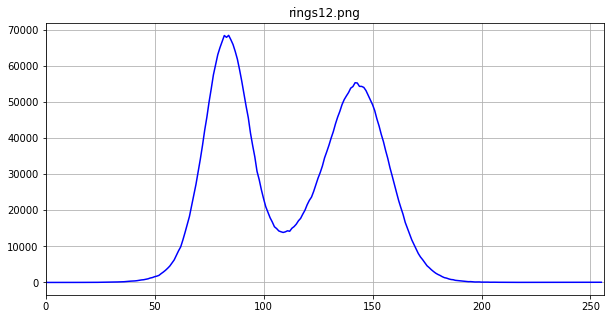

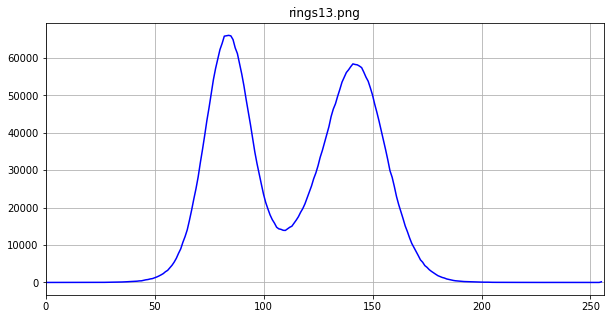

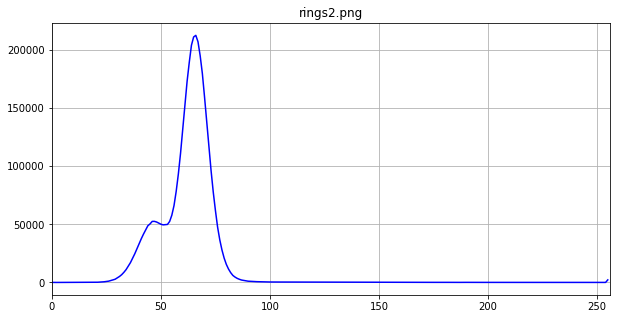

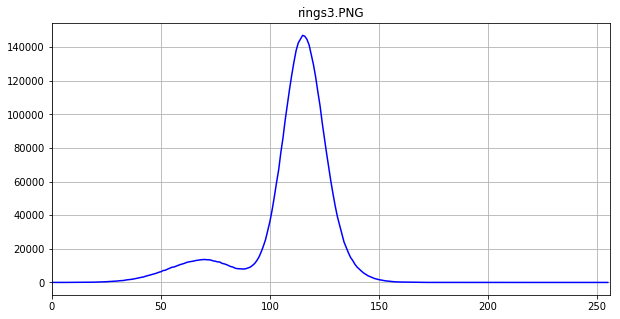

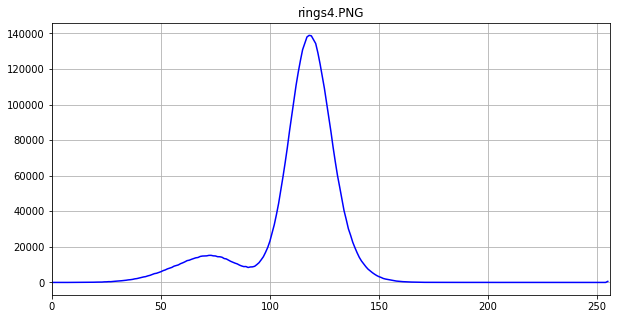

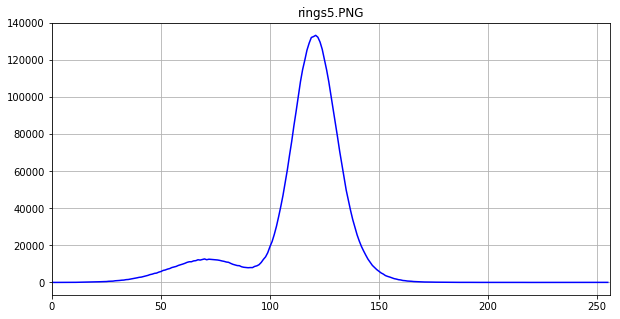

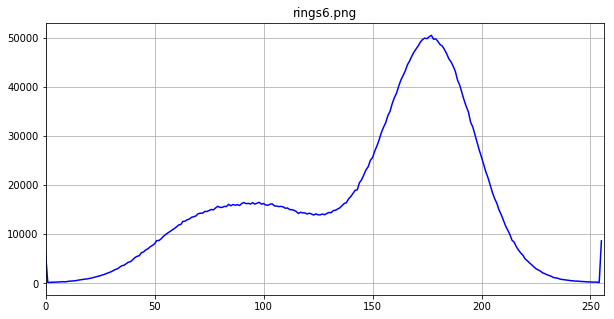

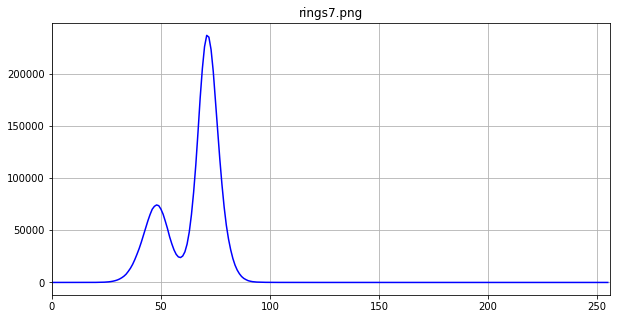

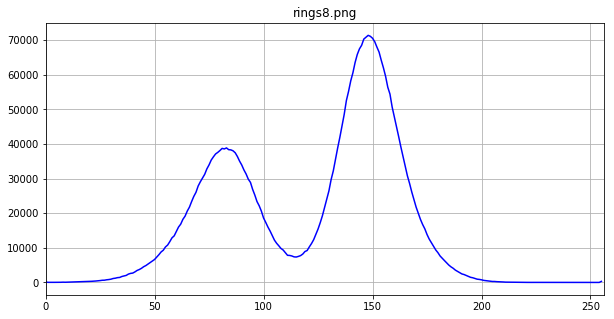

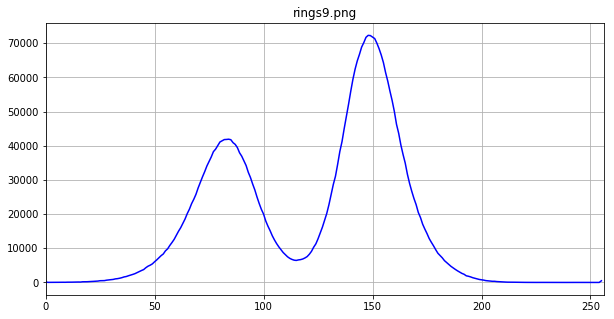

In [5]:
for i in imgFiles:
    newFilePath = mypath + i
    curImg = cv.imread(newFilePath, 0)
    drawGrayHistMasked(curImg, title = i)

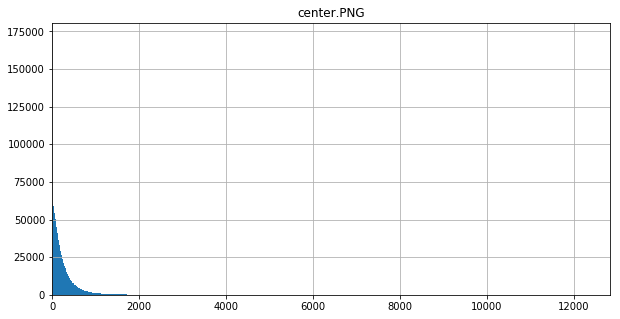

Result threshold =  1591.0


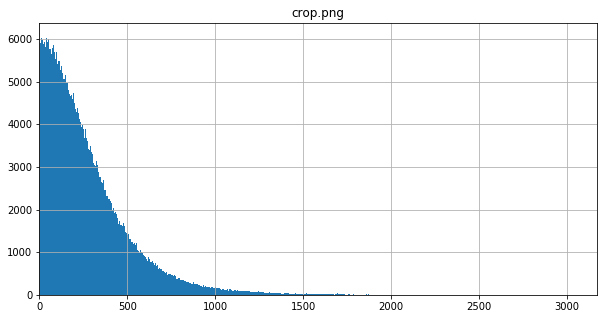

Result threshold =  1149.0


KeyboardInterrupt: 

In [12]:
for i in imgFiles:
    newFilePath = mypath + i
    curImg = cv.imread(newFilePath, 0)
    curImg = makeConvolveFiltering(curImg)
    drawGrayHist(curImg, int(np.max(curImg) + 1), title = i)
    print("Result threshold = ", np.percentile(curImg, 99))